# Importing libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB

# Loading dataset

In [2]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [3]:
X_train, y_train =  train.drop(["Depression"], axis=1), train["Depression"]
X_test, y_test =  test.drop(["Depression"], axis=1), test["Depression"]

# Model training

In [4]:
nb = GaussianNB()

In [5]:
param_grid = {
    # 'var_smoothing': uniform(1e-10, 1e-1)  # Smoothing parameter range
}

In [6]:
grid_search = RandomizedSearchCV(estimator=nb, param_distributions=param_grid,  scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

In [7]:
grid_search.fit(X_train, y_train)

c:\Users\smend\miniconda3\envs\stevens\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={}, scoring='accuracy', verbose=2)

# Model Evaluation

In [8]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")

Best Parameters: {}
Best Cross-Validated Accuracy: 0.8408335182882516


In [9]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2320
           1       0.86      0.88      0.87      3247

    accuracy                           0.85      5567
   macro avg       0.84      0.84      0.84      5567
weighted avg       0.84      0.85      0.85      5567



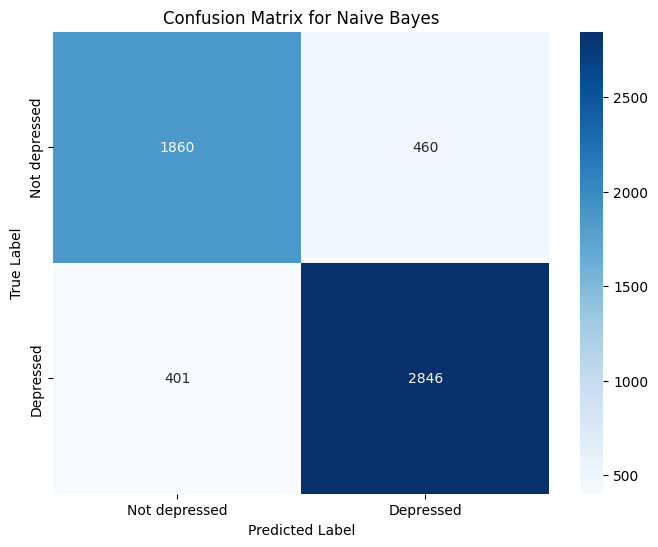

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not depressed", "Depressed"],
            yticklabels=["Not depressed", "Depressed"])
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AUROC Curve

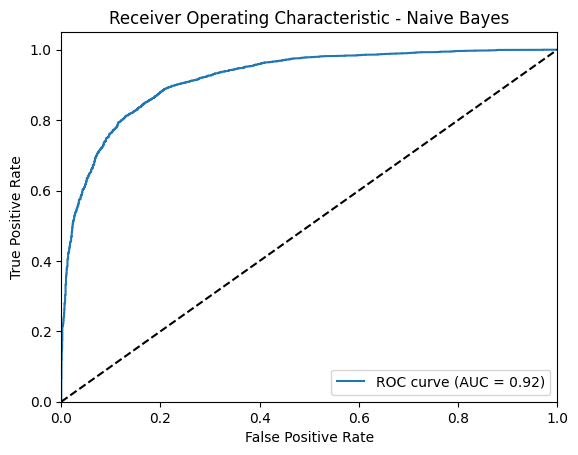

In [11]:
# Predict probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Feature Importance

In [12]:
from sklearn.inspection import permutation_importance

In [ ]:
perm_importance = permutation_importance(best_model, X_train, y_train, scoring='accuracy')
print(perm_importance.importances_mean)

[5.38938292e-05 1.04464206e-02 1.61681487e-04 6.14389652e-02
 1.52699183e-04 5.04805533e-03 1.23955807e-03 7.48225995e-03
 3.68274499e-04 1.46833738e-01 1.00871284e-02 3.04679781e-02
 1.16769963e-03]


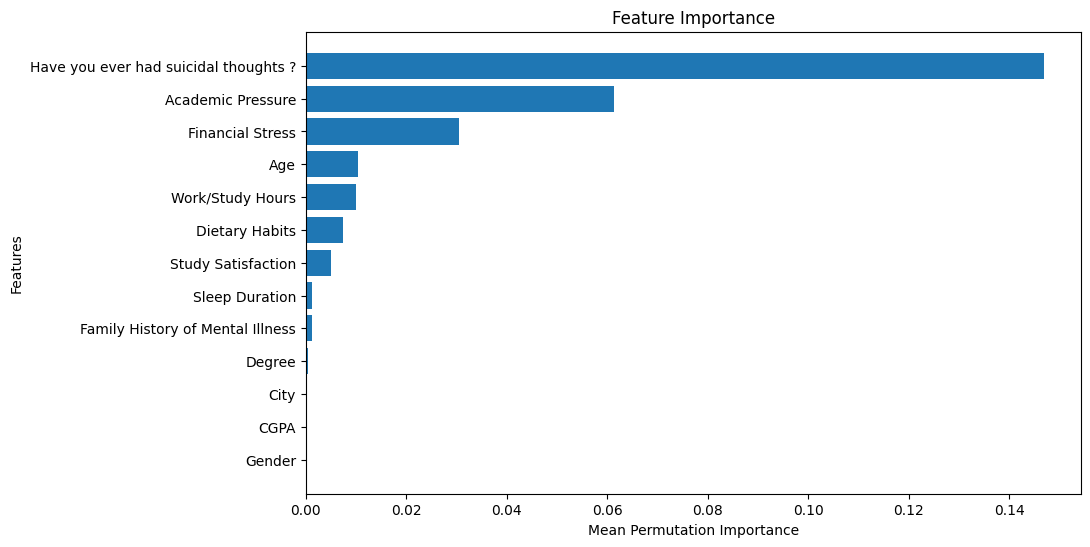

In [18]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), train.columns[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Mean Permutation Importance')
plt.ylabel('Features')
plt.show()